In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
cm = confusion_matrix(y_true, y_pred)

In [6]:
cm

array([[2, 0],
       [1, 3]], dtype=int64)

In [8]:
tn, fp, fn, tp = cm.ravel()

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [13]:
y_pred = np.array([1,0,1,0,1,1,1,0,0])
y_true = np.array([1,1,1,0,0,0,1,1,1])

In [14]:
\

9

In [15]:
len(y_pred)

9

In [16]:
f1_score(y_true,y_pred)

0.5454545454545454

In [17]:
recall_score(y_true,y_pred)

0.5

In [20]:
url = 'http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt'

In [77]:
df = pd.read_table(url)

In [78]:
df[:3]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo


In [79]:
df.pop('who')

0        id74364
1        id84505
2        id84509
3        id87028
4        id76087
          ...   
19578    id83400
19579    id72216
19580     id8654
19581    id84503
19582    id87674
Name: who, Length: 19583, dtype: object

In [80]:
df.pop('Country')

0           Ontario
1            Sweden
2        Washington
3           Florida
4        New Jersey
            ...    
19578         Texas
19579    New Jersey
19580      Missouri
19581      Kentucky
19582    California
Name: Country, Length: 19583, dtype: object

In [81]:
df.pop('Years on Internet')

0            4-6 yr
1            1-3 yr
2        Under 6 mo
3           6-12 mo
4            1-3 yr
            ...    
19578        4-6 yr
19579        4-6 yr
19580        1-3 yr
19581    Under 6 mo
19582        1-3 yr
Name: Years on Internet, Length: 19583, dtype: object

In [82]:
df[:3]

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
Newbie                  19583 non-null int64
Age                     19022 non-null float64
Gender                  19583 non-null object
Household Income        16398 non-null object
Sexual Preference       18291 non-null object
Education Attainment    19583 non-null object
Major Occupation        19583 non-null object
Marital Status          19240 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [84]:
category_cols = ["Gender", 'Household Income', 'Sexual Preference', 'Education Attainment', 'Major Occupation', "Marital Status"]

In [85]:
for col in category_cols:
    df[col] = df[col].astype('category')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
Newbie                  19583 non-null int64
Age                     19022 non-null float64
Gender                  19583 non-null category
Household Income        16398 non-null category
Sexual Preference       18291 non-null category
Education Attainment    19583 non-null category
Major Occupation        19583 non-null category
Marital Status          19240 non-null category
dtypes: category(6), float64(1), int64(1)
memory usage: 422.3 KB


In [87]:
df_onehot = pd.get_dummies(df)

In [88]:
df_onehot[:3]

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [90]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 38 columns):
Newbie                               19583 non-null int64
Age                                  19022 non-null float64
Gender_Female                        19583 non-null uint8
Gender_Male                          19583 non-null uint8
Household Income_$10-19              19583 non-null uint8
Household Income_$20-29              19583 non-null uint8
Household Income_$30-39              19583 non-null uint8
Household Income_$40-49              19583 non-null uint8
Household Income_$50-74              19583 non-null uint8
Household Income_$75-99              19583 non-null uint8
Household Income_Over $100           19583 non-null uint8
Household Income_Under $10           19583 non-null uint8
Sexual Preference_Bisexual           19583 non-null uint8
Sexual Preference_Gay male           19583 non-null uint8
Sexual Preference_Heterosexual       19583 non-null uint8
Sexual Preference_L

In [93]:
df_onehot.isnull().sum()

Newbie                               0
Age                                  0
Gender_Female                        0
Gender_Male                          0
Household Income_$10-19              0
Household Income_$20-29              0
Household Income_$30-39              0
Household Income_$40-49              0
Household Income_$50-74              0
Household Income_$75-99              0
Household Income_Over $100           0
Household Income_Under $10           0
Sexual Preference_Bisexual           0
Sexual Preference_Gay male           0
Sexual Preference_Heterosexual       0
Sexual Preference_Lesbian            0
Sexual Preference_Transgender        0
Sexual Preference_na                 0
Education Attainment_College         0
Education Attainment_Doctoral        0
Education Attainment_Grammar         0
Education Attainment_High School     0
Education Attainment_Masters         0
Education Attainment_Other           0
Education Attainment_Professional    0
Education Attainment_Some

In [111]:
df_onehot.loc[pd.isnull(df_onehot['Age']),'Age'] = df_onehot['Age'].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'method'

In [109]:
df_onehot

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,0,22,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19579,0,19,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
19580,0,49,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
19581,1,42,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [92]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 38 columns):
Newbie                               19583 non-null int64
Age                                  19583 non-null object
Gender_Female                        19583 non-null uint8
Gender_Male                          19583 non-null uint8
Household Income_$10-19              19583 non-null uint8
Household Income_$20-29              19583 non-null uint8
Household Income_$30-39              19583 non-null uint8
Household Income_$40-49              19583 non-null uint8
Household Income_$50-74              19583 non-null uint8
Household Income_$75-99              19583 non-null uint8
Household Income_Over $100           19583 non-null uint8
Household Income_Under $10           19583 non-null uint8
Sexual Preference_Bisexual           19583 non-null uint8
Sexual Preference_Gay male           19583 non-null uint8
Sexual Preference_Heterosexual       19583 non-null uint8
Sexual Preference_Le

In [110]:
df_onehot['Age'] = df_onehot['Age'].astype('float64')

TypeError: float() argument must be a string or a number, not 'method'

In [106]:
x_data = df_onehot.iloc[:,1:].values

In [104]:
x_data.shape

(19583, 37)

In [108]:
x_data.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [96]:
y_data = df_onehot.iloc[:,0].values.reshape(-1,1)

In [97]:
y_data.shape

(19583, 1)

In [98]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [99]:
min_max_scaler.fit_transform(x_data)

TypeError: float() argument must be a string or a number, not 'method'

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)


In [71]:
x_train

array([[28.0, 0, 1, ..., 0, 0, 0],
       [31.0, 0, 1, ..., 0, 0, 0],
       [55.0, 0, 1, ..., 0, 0, 0],
       ...,
       [24.0, 0, 1, ..., 0, 0, 0],
       [42.0, 0, 1, ..., 0, 0, 0],
       [35.0, 0, 1, ..., 0, 0, 0]], dtype=object)

In [72]:
 from sklearn.linear_model import LogisticRegression


In [73]:
logreg = LogisticRegression(fit_intercept=True)

In [74]:
logreg.fit(x_train,y_train.flatten)

C:\Users\46861\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'method'

In [112]:
def softmax(values):
    array_values = np.exp(values)
    return array_values / np.sum(array_values)


In [125]:
y= softmax([2,1,5,0.5])

In [127]:
y

array([0.04613281, 0.01697131, 0.92660226, 0.01029362])

In [116]:
sum(y)

1.0

In [120]:
np.exp(2)/(np.exp(2)+np.exp(1)+np.exp(0.5)+np.exp(5))

0.04613280989522009

In [124]:
array_values

NameError: name 'array_values' is not defined

In [132]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [134]:
digit_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

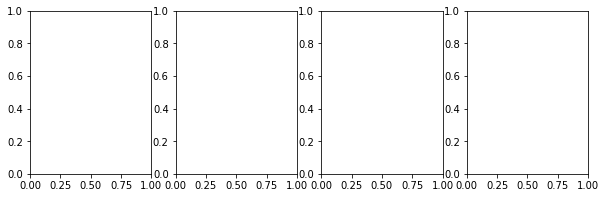

In [137]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

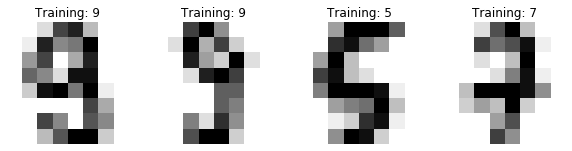

In [142]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num] 
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest') # (4)
    ax.set_title('Training: %i' % label)

In [141]:
digit_dataset["data"][0].shape

(64,)

In [144]:
X = digit_dataset["data"]
y = digit_dataset["target"]
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [147]:
x_train.shape

(1347, 64)

In [148]:
x_test.shape

(450, 64)

In [149]:
from sklearn.linear_model import LogisticRegression
logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial",solver="sag")
#소프트맥스랑 경사하강법


In [150]:
logreg_softmax.fit(x_train,y_train)

C:\Users\46861\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_softmax.predict(x_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[43,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  2,  0,  1,  0,  0],
       [ 1,  1,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  1,  0],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 40]], dtype=int64)

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.93      0.95      0.94        44
           2       0.98      1.00      0.99        49
           3       1.00      0.93      0.96        44
           4       1.00      0.95      0.97        41
           5       0.89      0.93      0.91        43
           6       0.98      0.98      0.98        47
           7       0.98      0.98      0.98        48
           8       0.92      0.92      0.92        49
           9       0.95      0.98      0.96        41

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [154]:
result = confusion_matrix(y_true,y_pred)

In [158]:
precision_score(y_true,y_pred,average= 'micro')

0.96

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
